In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt

2025-04-10 15:54:52.525548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 15:54:52.545299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744280692.570038    1812 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744280692.577022    1812 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 15:54:52.600548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
embeddings = np.load('embeddings_resnet18.npy')
labels = np.load('labels_resnet18.npy')

In [3]:
# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


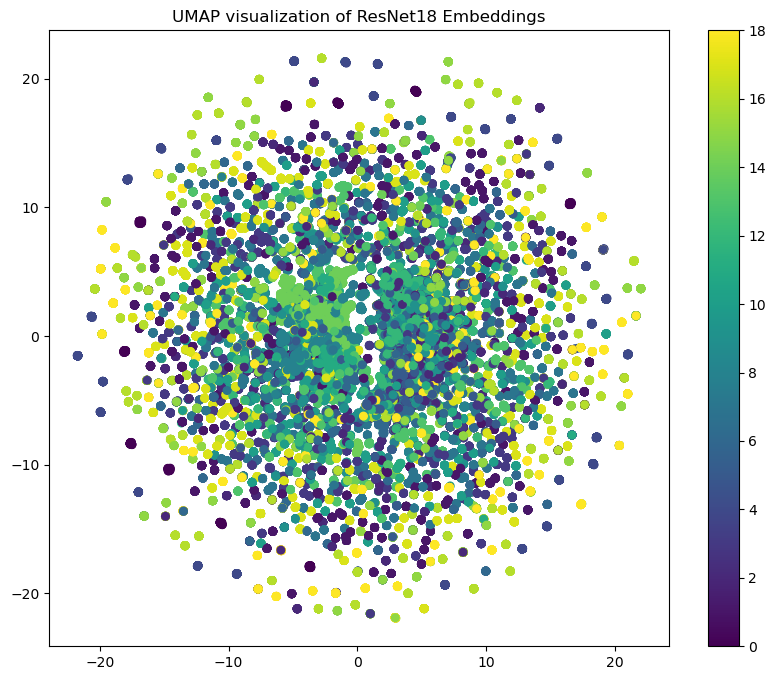

In [5]:
# Plot UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP visualization of ResNet18 Embeddings")
plt.show()

/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited at iteration 206 with accuracies 
[1.29317904e-15 1.38792561e-05 4.26590904e-06 3.72552585e-06]
not reaching the requested tolerance 5.111098289489746e-06.
Use iteration 206 instead with accuracy 
5.467672749137565e-06.

  _, diffusion_map = lobpcg(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.34814703e-15 1.38792562e-05 4.26590891e-06 3.72552579e-06]
not reaching the requested tolerance 5.111098289489746e-06.
  _, diffusion_map = lobpcg(
/root/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small a

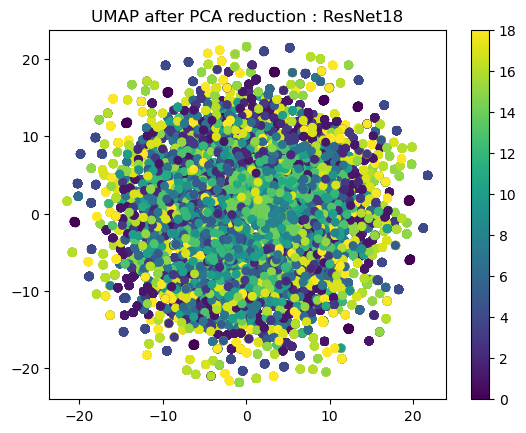

In [3]:
from sklearn.decomposition import PCA

# First reduce dimensions using PCA
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)

# Then apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings_pca)

# Visualize with UMAP
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP after PCA reduction : ResNet18")
plt.show()

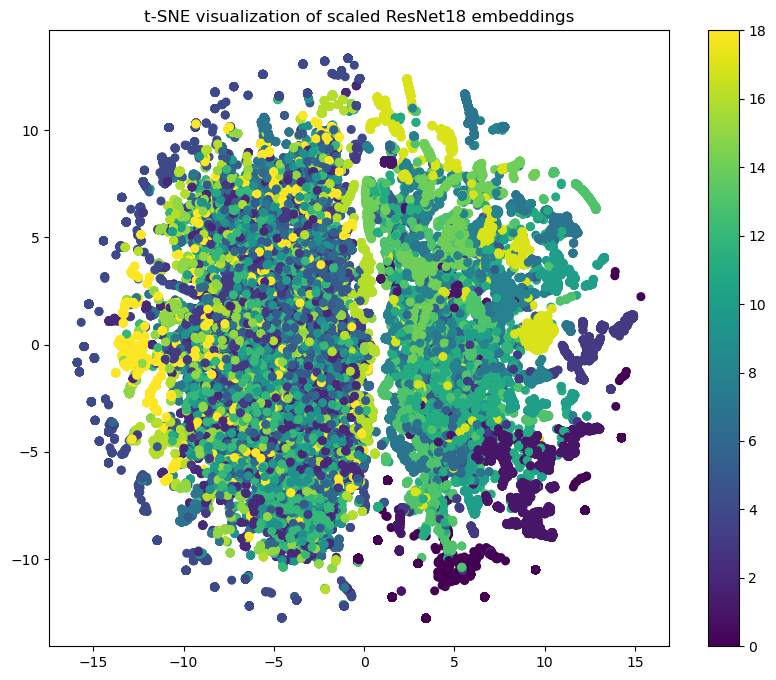

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# First, standardize embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply t-SNE after scaling
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled ResNet18 embeddings")
plt.show()

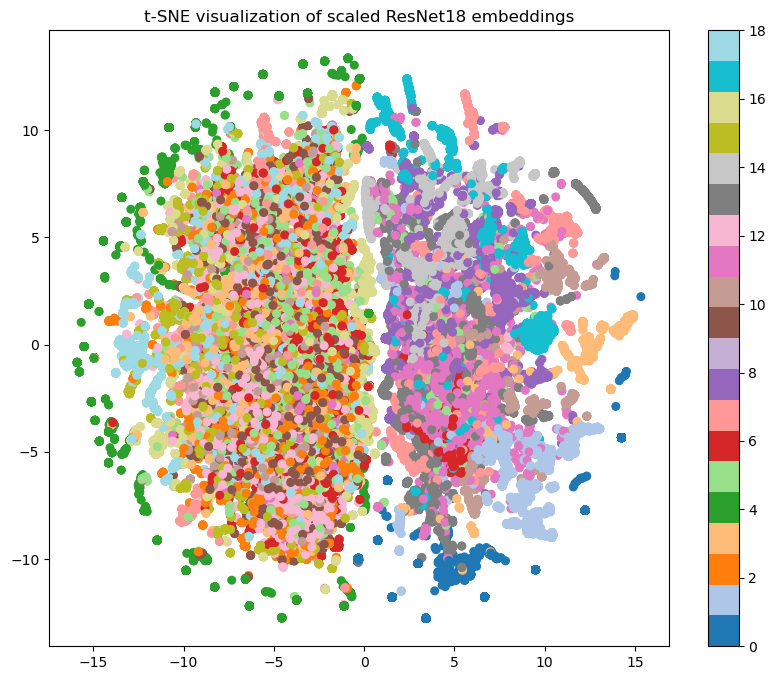

In [8]:
# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='tab20', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled ResNet18 embeddings")
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier on the embeddings
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embeddings_scaled, labels)

# Evaluate accuracy
predictions = knn.predict(embeddings_scaled)
accuracy = accuracy_score(labels, predictions)
print(f"k-NN accuracy: {accuracy * 100:.2f}%")

k-NN accuracy: 93.76%


In [9]:
from sklearn.metrics import classification_report
report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       0.98      1.00      0.99      3485
           2       0.84      0.97      0.90      3447
           3       0.94      0.97      0.95      3391
           4       1.00      1.00      1.00      3464
           5       0.83      0.65      0.73      3469
           6       0.88      0.98      0.93      3424
           7       0.97      0.96      0.97      3477
           8       0.96      0.97      0.97      3511
           9       0.85      0.86      0.85      3498
          10       0.92      0.95      0.94      3418
          11       0.97      0.73      0.83      3517
          12       0.91      0.80      0.85      3534
          13       0.97      0.97      0.97      3439
          14       0.96      1.00      0.98      3512
          15       0.94      1.00      0.97      3470
          16       0.97      1.00      0.99      3404
          17       0.97    

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply k-means clustering
kmeans = KMeans(n_clusters=len(set(labels)), random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_scaled)

# Evaluate using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Evaluate clustering with silhouette score
sil_score = silhouette_score(embeddings_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.1819
Silhouette Score: 0.0402
